# 🧪 Previsão de Exames de Diabetes com Scikit-Learn

## 🩺 Descrição do Problema
Imagine um laboratório de análises clínicas que deseja prever os **resultados de exames de diabetes** com base em características dos pacientes, como:
- Idade
- Peso
- Altura
- Pressão arterial
- Nível de glicose

Vamos usar dados históricos para treinar um modelo de **classificação supervisionada**, capaz de prever se um paciente é diabético (1) ou não (0).

## 📦 Etapa 1: Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📂 Etapa 2: Carregando os dados (Pima Indians Diabetes Dataset)

In [2]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 🔍 Etapa 3: Análise Exploratória Rápida

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


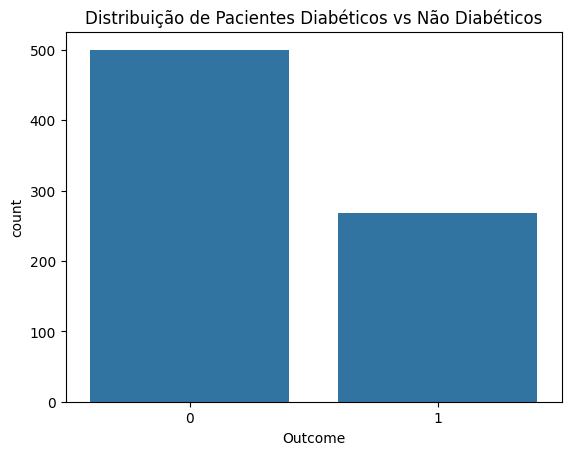

In [4]:
sns.countplot(data=df, x="Outcome")
plt.title("Distribuição de Pacientes Diabéticos vs Não Diabéticos")
plt.show()

## 🧹 Etapa 4: Pré-processamento

In [5]:
X = df.drop(columns="Outcome")
y = df["Outcome"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## ✂️ Etapa 5: Separação em treino e teste


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 🧠 Etapa 6: Treinando o modelo

In [7]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## 📈 Etapa 7: Avaliando o modelo

In [8]:
y_pred = modelo.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



## 🧮 Etapa 8: Matriz de Confusão

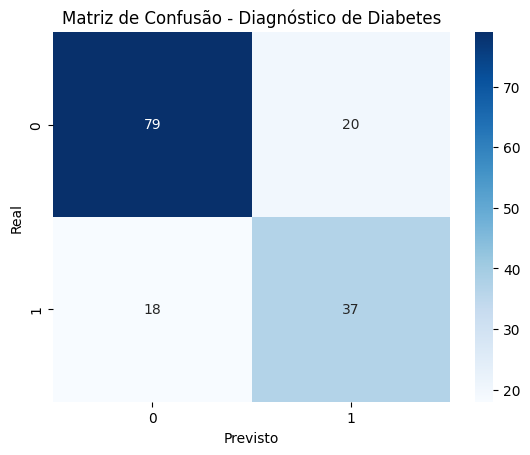

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Diagnóstico de Diabetes")
plt.show()

## ✅ Conclusão
Com base nas características dos pacientes, treinamos um modelo de classificação para prever resultados de exames de diabetes.  
Esse modelo pode ser utilizado para auxiliar no diagnóstico e triagem de pacientes em um laboratório real.
